In [2]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from pylab import subplot,imshow,title,gray,NullLocator
import scipy.misc as mi
import scipy.special as sp
from PIL import Image
from itertools import chain
from sklearn.metrics import confusion_matrix, accuracy_score


from keras.datasets import mnist
from keras.models import Sequential
from keras.layers.core import Dense, Dropout, Activation
from keras.utils import np_utils
from keras.models import model_from_json

from keras.layers import Flatten
from keras.layers.convolutional import Conv2D
from keras.layers.convolutional import MaxPooling2D
from keras.utils import np_utils
from keras import backend as K
K.set_image_dim_ordering('th')

In [3]:
# visualizza dati
def displayData(X, t, rows=10, cols=10, img_ind=None, size =16, class_value = False):
    if len(X)>rows*cols:
        img_ind = np.random.permutation(len(X))[0:rows * cols]
    else:
        img_ind = range(rows*cols)
    fig = plt.figure(figsize = (size,size))
    fig.patch.set_facecolor('white')
    ax = fig.gca()
    for i in range(100):
        plt.subplot(10,10,i+1)
        plt.imshow([255-x for x in X[img_ind[i]]], cmap='gray', interpolation='gaussian')
        if class_value:
            plt.title("{}".format(t[img_ind[i]]),fontsize = 20)
        plt.gca().xaxis.set_major_locator(plt.NullLocator())
        plt.gca().yaxis.set_major_locator(plt.NullLocator())
        plt.axis('off')
    plt.subplots_adjust(top=1)
    plt.show()

In [4]:
def plotData(X, Y, c, npixel=28):
    m, n = X.shape
    image = np.array(X[c,:])
    plt.figure(figsize = (6,6))
    plt.imshow((image.reshape(npixel, npixel)), cmap='Greys', interpolation='quadric')
    plt.show()

In [5]:
def plotAccuracy(acc_history_train, acc_history_test):
    plt.figure(figsize = (12,8))
    plt.plot(acc_history_train, marker='o', markersize=5, label='Train')
    plt.plot(acc_history_test, marker='o', markersize=5, label='Test')
    plt.legend()
    plt.gca().xaxis.set_major_locator(plt.NullLocator())
    plt.show()

In [6]:
def save_model(m,filename):
    model_json = m.to_json()
    with open(filename+".json", "w") as json_file:
        json_file.write(model_json)
    # serialize weights to HDF5
    m.save_weights(filename+".h5")
    print("Saved model to disk")

In [7]:
def load_model(filename):
    json_file = open(filename+'.json', 'r')
    loaded_model_json = json_file.read()
    json_file.close()
    m = model_from_json(loaded_model_json)
    # load weights into new model
    m.load_weights(filename+".h5")
    print("Loaded model from disk")
    return m

Fissa il numero di classi. Leggi i dati.

In [8]:
nb_classes = 10

(X_train, y_train), (X_test, y_test) = mnist.load_data()

In [9]:
X_test.shape

(10000, 28, 28)

Esempio di dati

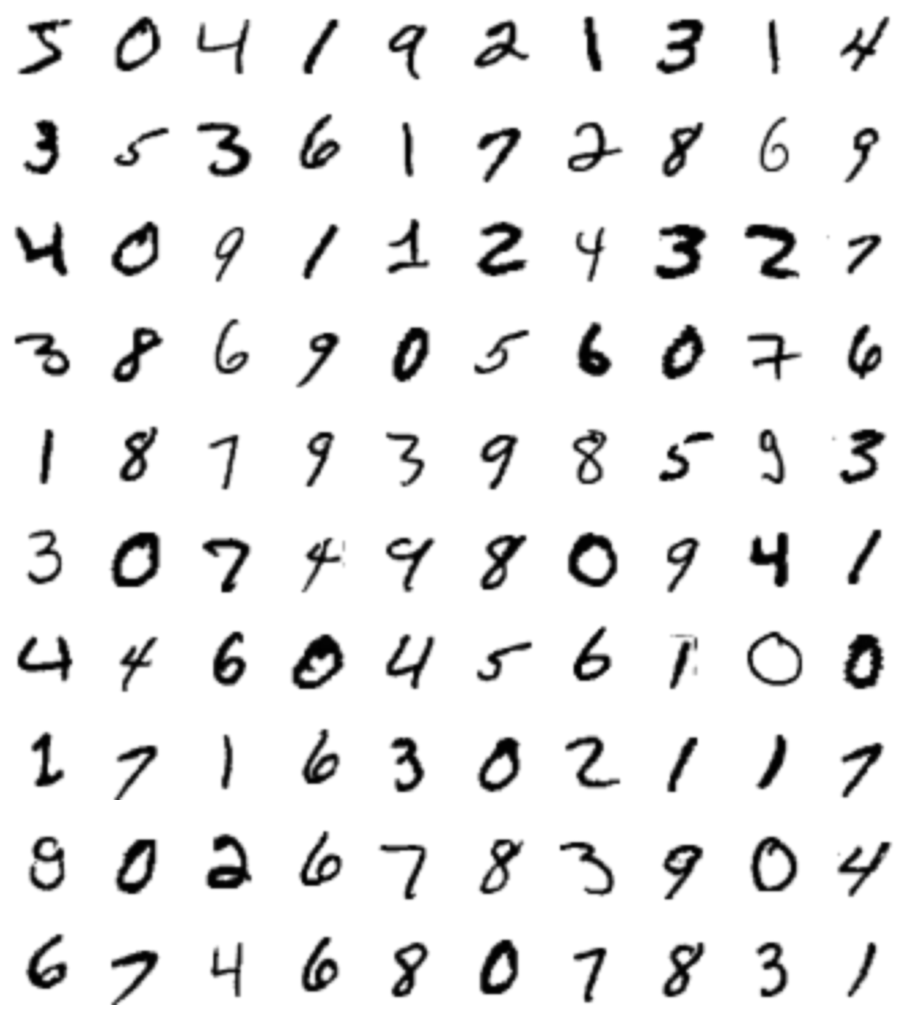

In [10]:
displayData(X_train[0:100], y_train[0:100])

Esempio di dati con relativa classe

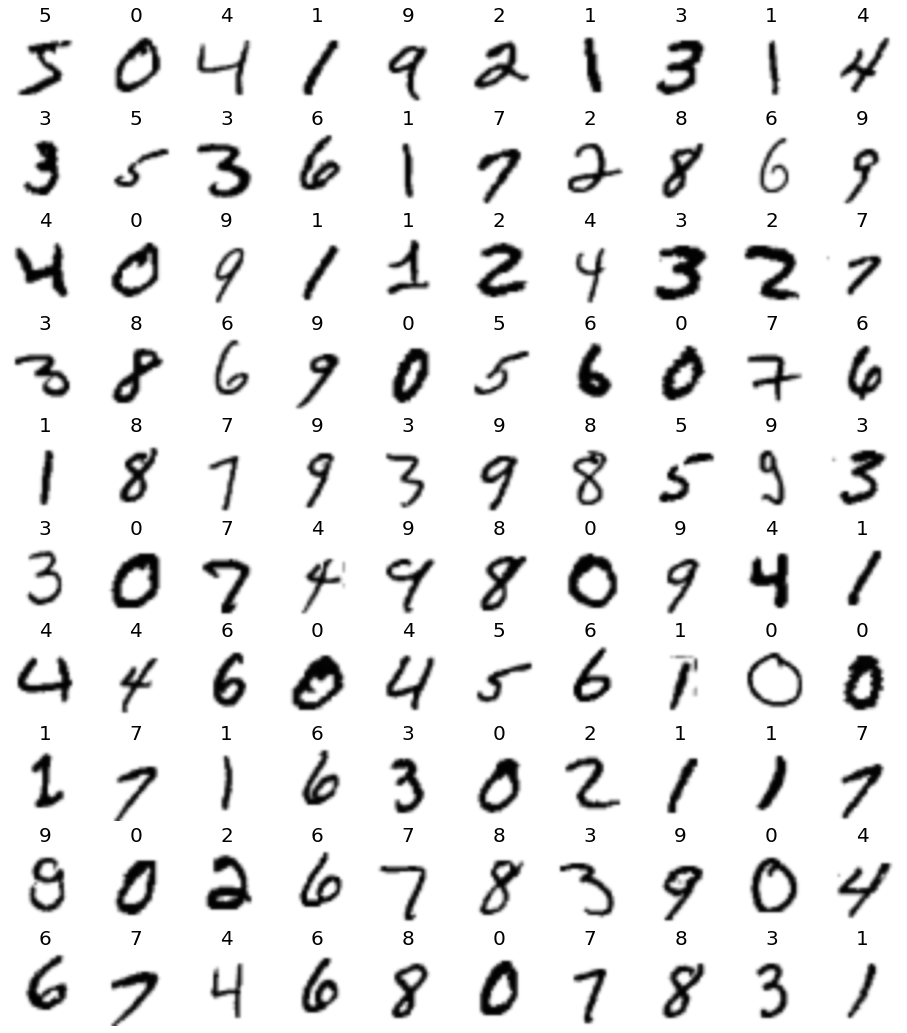

In [11]:
displayData(X_train[0:100], y_train[0:100], class_value=True)

In [12]:
X_train = X_train.reshape(60000, 784)
X_test = X_test.reshape(10000, 784)
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255
X_test /= 255

In [13]:
Y_train = np_utils.to_categorical(y_train, nb_classes)
Y_test = np_utils.to_categorical(y_test, nb_classes)

Costruisci il modello (insieme delle possibili funzioni)

In [15]:
# softmax regression
model0 = Sequential()
model0.add(Dense(10, input_shape=(784,)))
model0.add(Activation('softmax'))
model0.compile(loss='categorical_crossentropy', metrics=['accuracy'], optimizer='sgd')

Cerca la migliore funzione possibile, rispetto ai dati disponibili

In [17]:
history0 = model0.fit(X_train, Y_train, batch_size=1024, epochs=20, verbose=1, validation_data=(X_test, Y_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/20
60000/60000 [==============================] - 0s 6us/step - loss: 0.5774 - acc: 0.8600 - val_loss: 0.5485 - val_acc: 0.8717
Epoch 2/20
60000/60000 [==============================] - 0s 6us/step - loss: 0.5682 - acc: 0.8613 - val_loss: 0.5398 - val_acc: 0.8723
Epoch 3/20
60000/60000 [==============================] - 0s 6us/step - loss: 0.5597 - acc: 0.8626 - val_loss: 0.5317 - val_acc: 0.8733
Epoch 4/20
60000/60000 [==============================] - 0s 6us/step - loss: 0.5518 - acc: 0.8640 - val_loss: 0.5241 - val_acc: 0.8750
Epoch 5/20
60000/60000 [==============================] - 0s 6us/step - loss: 0.5445 - acc: 0.8651 - val_loss: 0.5170 - val_acc: 0.8761
Epoch 6/20
60000/60000 [==============================] - 0s 6us/step - loss: 0.5376 - acc: 0.8659 - val_loss: 0.5104 - val_acc: 0.8771
Epoch 7/20
60000/60000 [==============================] - 0s 5us/step - loss: 0.5311 - acc: 0.8670 - val_loss: 0.5042 - val_acc: 0.877

Accuracy: frazione di risposte corrette

In [18]:
acc_values0 = history0.history['acc']
val_acc_values0 = history0.history['val_acc']

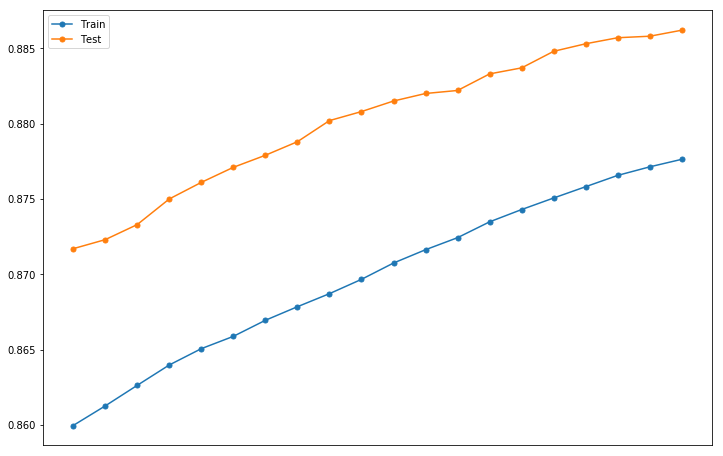

In [19]:
plotAccuracy(acc_values0, val_acc_values0)

In [20]:
predictions_train = model0.predict_classes(X_train, verbose=0)

In [21]:
confusion_matrix(y_train, predictions_train)

array([[5646,    0,   33,   21,   11,   44,   76,    9,   71,   12],
       [   0, 6470,   40,   27,    5,   59,   11,   12,  109,    9],
       [  72,  107, 4981,  110,  131,   21,  159,  128,  205,   44],
       [  43,   54,  164, 5182,    8,  272,   55,   88,  173,   92],
       [  19,   51,   36,    3, 5234,   12,   78,   19,   59,  331],
       [ 108,  114,   46,  314,  114, 4191,  137,   37,  251,  109],
       [  55,   38,   99,    7,   45,   98, 5515,    3,   57,    1],
       [  56,  130,   94,   15,   98,    8,    5, 5568,   25,  266],
       [  36,  199,   83,  233,   38,  211,   49,   40, 4815,  147],
       [  52,   53,   56,  103,  261,   39,    7,  230,   64, 5084]])

In [22]:
accuracy_score(y_train, predictions_train)

0.8781

In [23]:
predictions_test = model0.predict_classes(X_test, verbose=0)

In [24]:
confusion_matrix(y_test, predictions_test)

array([[ 948,    0,    3,    4,    0,    4,   12,    1,    8,    0],
       [   0, 1095,    3,    5,    1,    4,    4,    1,   22,    0],
       [  14,    7,  870,   21,   19,    1,   23,   21,   47,    9],
       [   6,    1,   17,  887,    1,   38,    7,   17,   24,   12],
       [   2,    7,    5,    1,  887,    1,   14,    1,   10,   54],
       [  17,    9,    2,   56,   20,  700,   20,   11,   44,   13],
       [  16,    3,    8,    2,   10,   18,  890,    1,   10,    0],
       [   7,   24,   30,    3,    9,    0,    2,  902,    7,   44],
       [   8,   11,   11,   37,    9,   31,   18,   13,  818,   18],
       [  15,   10,    7,   12,   52,   12,    2,   27,    7,  865]])

In [25]:
accuracy_score(y_test, predictions_test)

0.8862

In [26]:
w = model0.layers[0].get_weights()[0]

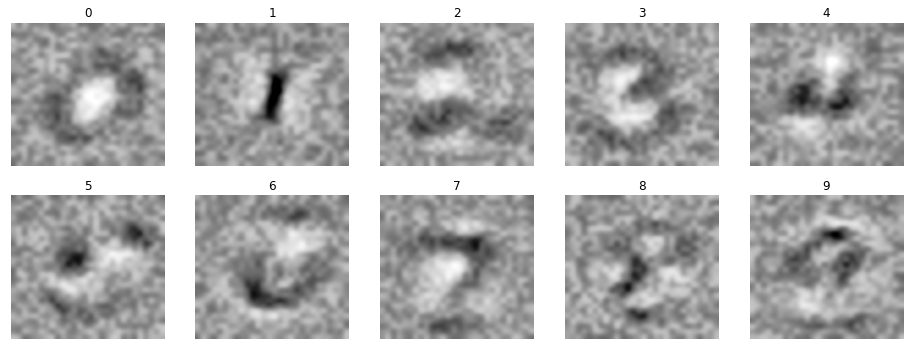

In [27]:
fig = plt.figure(figsize=(16,16))
fig.patch.set_facecolor('white')
for i in range(10):
    ax = subplot(2,5,i+1,frame_on=False, facecolor="#F8F8F8")
    ax.xaxis.set_major_locator(NullLocator())
    ax.yaxis.set_major_locator(NullLocator())
    imshow(w[:,i].reshape(28,28), interpolation='quadric', 
           cmap=plt.get_cmap('Greys'), vmin=np.mean(w[:,i])-3.5*np.std(w[:,i]), 
           vmax=np.mean(w[:,i])+3.5*np.std(w[:,i]), aspect='auto')
    plt.title(i)
plt.subplots_adjust(top=0.4)
plt.show()

Elemento 2102


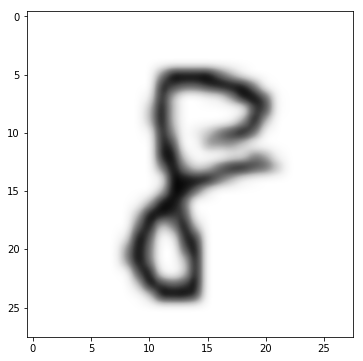

Un 8, classificato come 8


In [40]:
c = np.random.randint(0, X_test.shape[0])
p=model0.predict_classes(X_test[c:c+1,:], verbose=0)
print("Elemento "+str(c))
plotData(X_test, y_test, c)
print("Un "+str(y_test[c])+", classificato come " + str(p[0]))

In [41]:
# 3 layer NN
model1 = Sequential()
model1.add(Dense(512, input_shape=(784,)))
model1.add(Activation('relu'))
model1.add(Dropout(0.2))
model1.add(Dense(10))
model1.add(Activation('softmax'))
model1.compile(loss='categorical_crossentropy', metrics=['accuracy'], optimizer='adam')

In [42]:
history1 = model1.fit(X_train, Y_train, batch_size=1024, epochs=10, verbose=1, validation_data=(X_test, Y_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 4s 60us/step - loss: 0.5757 - acc: 0.8416 - val_loss: 0.2616 - val_acc: 0.9242
Epoch 2/10
60000/60000 [==============================] - 4s 61us/step - loss: 0.2446 - acc: 0.9311 - val_loss: 0.1921 - val_acc: 0.9465
Epoch 3/10
60000/60000 [==============================] - 4s 62us/step - loss: 0.1826 - acc: 0.9485 - val_loss: 0.1534 - val_acc: 0.9570
Epoch 4/10
60000/60000 [==============================] - 4s 60us/step - loss: 0.1479 - acc: 0.9579 - val_loss: 0.1289 - val_acc: 0.9631
Epoch 5/10
60000/60000 [==============================] - 4s 60us/step - loss: 0.1232 - acc: 0.9656 - val_loss: 0.1121 - val_acc: 0.9673
Epoch 6/10
60000/60000 [==============================] - 4s 60us/step - loss: 0.1058 - acc: 0.9698 - val_loss: 0.1009 - val_acc: 0.9705
Epoch 7/10
60000/60000 [==============================] - 4s 61us/step - loss: 0.0919 - acc: 0.9742 - val_loss: 0.0921 - val_acc

In [30]:
acc_values1 = history1.history['acc']
val_acc_values1 = history1.history['val_acc']

epochs1 = range(1, len(acc_values1) + 1)

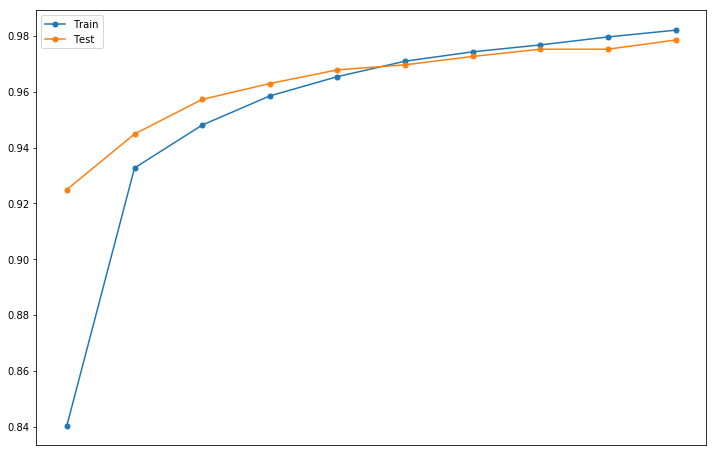

In [31]:
plotAccuracy(acc_values1, val_acc_values1)

In [32]:
predictions_train = model1.predict_classes(X_train, verbose=0)

In [33]:
confusion_matrix(y_train, predictions_train)

array([[5881,    1,    0,    1,    0,    4,   12,    1,   13,   10],
       [   1, 6690,    9,    3,    8,    0,    4,   12,    8,    7],
       [   9,    5, 5875,    7,   10,    3,    4,   21,   19,    5],
       [   2,    4,   18, 5994,    1,   30,    1,   21,   36,   24],
       [   2,    8,    3,    0, 5767,    1,   10,    4,    3,   44],
       [   6,    3,    4,   20,    4, 5352,   13,    1,    7,   11],
       [  10,    4,    0,    0,    7,   12, 5878,    0,    7,    0],
       [   2,   14,   12,    0,   10,    1,    0, 6198,    5,   23],
       [   5,   25,    3,   11,    5,    9,   10,    6, 5761,   16],
       [   7,    4,    0,    8,   20,    9,    1,   21,    8, 5871]])

In [34]:
accuracy_score(y_train, predictions_train)

0.9877833333333333

In [35]:
predictions_test = model1.predict_classes(X_test, verbose=0)

In [36]:
confusion_matrix(y_test, predictions_test)

array([[ 971,    0,    1,    1,    0,    2,    3,    1,    1,    0],
       [   0, 1123,    4,    0,    0,    0,    3,    0,    5,    0],
       [   4,    1, 1004,    1,    4,    0,    2,    7,    8,    1],
       [   0,    0,    3,  986,    0,    5,    0,    8,    5,    3],
       [   1,    0,    2,    1,  960,    0,    4,    2,    1,   11],
       [   2,    0,    0,    4,    2,  872,    6,    1,    3,    2],
       [   4,    3,    0,    1,    3,    4,  939,    0,    4,    0],
       [   0,    6,    9,    1,    0,    1,    0, 1003,    2,    6],
       [   4,    0,    1,    3,    3,    3,    3,    4,  948,    5],
       [   4,    4,    0,    4,    9,    1,    0,    6,    1,  980]])

In [37]:
accuracy_score(y_test, predictions_test)

0.9786

In [38]:
w0 = model1.layers[0].get_weights()[0]
w1 = model1.layers[3].get_weights()[0]
w = np.dot(w0,w1)

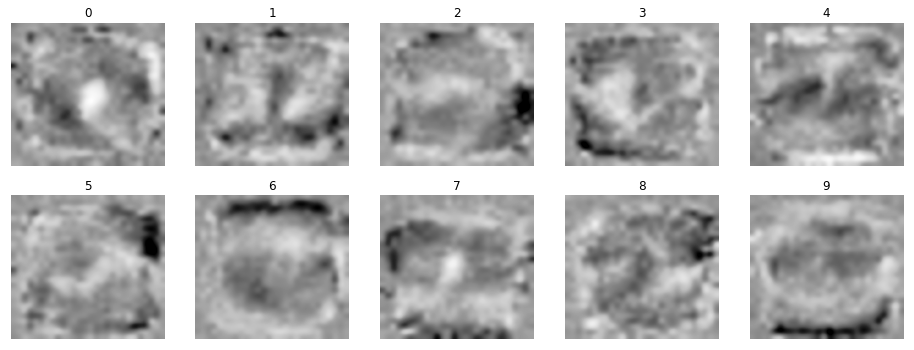

In [39]:
fig = plt.figure(figsize=(16,16))
fig.patch.set_facecolor('white')
for i in range(10):
    ax = subplot(2,5,i+1,frame_on=False, facecolor="#F8F8F8")
    ax.xaxis.set_major_locator(NullLocator())
    ax.yaxis.set_major_locator(NullLocator())
    imshow(w[:,i].reshape(28,28), interpolation='quadric', 
           cmap=plt.get_cmap('Greys'), vmin=np.mean(w[:,i])-3.5*np.std(w[:,i]), 
           vmax=np.mean(w[:,i])+3.5*np.std(w[:,i]), aspect='auto')
    plt.title(i)
plt.subplots_adjust(top=0.4)
plt.show()

In [45]:
# 4 layer NN
model2 = Sequential()
model2.add(Dense(512, input_shape=(784,)))
model2.add(Activation('relu'))
model2.add(Dropout(0.2))
model2.add(Dense(512))
model2.add(Activation('relu'))
model2.add(Dropout(0.2))
model2.add(Dense(10))
model2.add(Activation('softmax'))

In [46]:
model2.compile(loss='categorical_crossentropy', metrics=['accuracy'], optimizer='adam')

In [47]:
history2 = model2.fit(X_train, Y_train, batch_size=1024, epochs=10, verbose=1, validation_data=(X_test, Y_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 6s 108us/step - loss: 0.4909 - acc: 0.8601 - val_loss: 0.1827 - val_acc: 0.9454
Epoch 2/10
60000/60000 [==============================] - 6s 102us/step - loss: 0.1740 - acc: 0.9490 - val_loss: 0.1212 - val_acc: 0.9643
Epoch 3/10
60000/60000 [==============================] - 6s 108us/step - loss: 0.1195 - acc: 0.9649 - val_loss: 0.0969 - val_acc: 0.9694
Epoch 4/10
60000/60000 [==============================] - 7s 109us/step - loss: 0.0891 - acc: 0.9736 - val_loss: 0.0812 - val_acc: 0.9737
Epoch 5/10
60000/60000 [==============================] - 6s 104us/step - loss: 0.0726 - acc: 0.9779 - val_loss: 0.0739 - val_acc: 0.9765
Epoch 6/10
60000/60000 [==============================] - 6s 107us/step - loss: 0.0576 - acc: 0.9823 - val_loss: 0.0672 - val_acc: 0.9788
Epoch 7/10
60000/60000 [==============================] - 6s 105us/step - loss: 0.0494 - acc: 0.9848 - val_loss: 0.0636 - 

In [48]:
acc_values2 = history2.history['acc']
val_acc_values2 = history2.history['val_acc']

epochs2 = range(1, len(acc_values2) + 1)

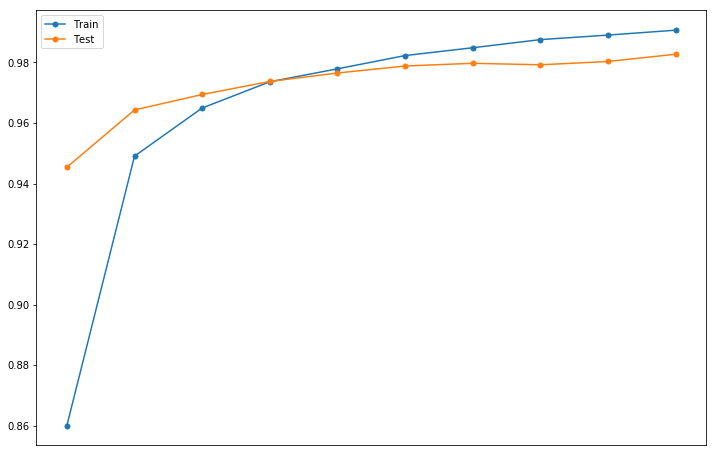

In [49]:
plotAccuracy(acc_values2, val_acc_values2)

In [50]:
predictions_train = model2.predict_classes(X_train, verbose=0)

In [51]:
confusion_matrix(y_train, predictions_train)

array([[5917,    0,    0,    0,    0,    0,    2,    0,    3,    1],
       [   0, 6722,    3,    1,    5,    0,    0,    9,    1,    1],
       [   3,    1, 5942,    1,    1,    0,    1,    6,    2,    1],
       [   0,    2,    8, 6084,    0,   10,    0,   12,    5,   10],
       [   0,    1,    0,    0, 5834,    0,    0,    1,    0,    6],
       [   0,    0,    1,    5,    0, 5403,    8,    0,    3,    1],
       [   2,    2,    0,    0,    2,    3, 5907,    0,    2,    0],
       [   1,    3,    3,    0,    0,    0,    0, 6255,    0,    3],
       [   3,   11,    4,    1,    0,    1,    2,    1, 5821,    7],
       [   0,    1,    0,    0,    4,    1,    0,    7,    1, 5935]])

In [52]:
accuracy_score(y_train, predictions_train)

0.997

In [53]:
predictions_test = model2.predict_classes(X_test, verbose=0)

In [54]:
confusion_matrix(y_test, predictions_test)

array([[ 972,    1,    0,    0,    1,    0,    2,    1,    2,    1],
       [   0, 1127,    3,    0,    0,    1,    2,    0,    2,    0],
       [   3,    0, 1015,    0,    2,    0,    2,    5,    4,    1],
       [   0,    0,    6,  986,    0,    3,    0,    7,    2,    6],
       [   1,    0,    2,    0,  965,    0,    3,    1,    0,   10],
       [   2,    0,    0,    4,    1,  873,    4,    0,    5,    3],
       [   4,    3,    0,    1,    4,    2,  944,    0,    0,    0],
       [   1,    2,    6,    0,    1,    0,    0, 1014,    1,    3],
       [   4,    1,    3,    3,    3,    5,    1,    6,  943,    5],
       [   2,    2,    0,    3,    7,    1,    1,    5,    0,  988]])

In [55]:
accuracy_score(y_test, predictions_test)

0.9827

In [56]:
w0 = model2.layers[0].get_weights()[0]
w1 = model2.layers[3].get_weights()[0]
w2 = model2.layers[6].get_weights()[0]
w = np.dot(np.dot(w0,w1),w2)

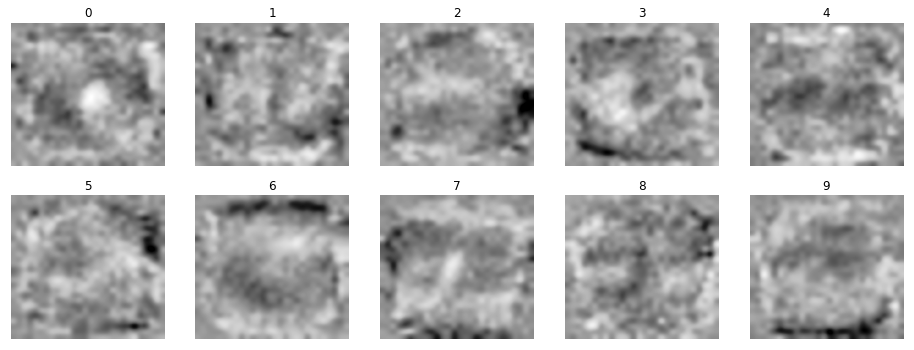

In [57]:
fig = plt.figure(figsize=(16,16))
fig.patch.set_facecolor('white')
for i in range(10):
    ax = subplot(2,5,i+1,frame_on=False, facecolor="#F8F8F8")
    ax.xaxis.set_major_locator(NullLocator())
    ax.yaxis.set_major_locator(NullLocator())
    imshow(w[:,i].reshape(28,28), interpolation='quadric', 
           cmap=plt.get_cmap('Greys'), vmin=np.mean(w[:,i])-3.5*np.std(w[:,i]), 
           vmax=np.mean(w[:,i])+3.5*np.std(w[:,i]), aspect='auto')
    plt.title(i)
plt.subplots_adjust(top=0.4)
plt.show()

In [58]:
model3 = Sequential()
model3.add(Conv2D(30, (5, 5), input_shape=(1, 28, 28), activation='relu'))
model3.add(MaxPooling2D(pool_size=(2, 2)))
model3.add(Conv2D(15, (3, 3), activation='relu'))
model3.add(MaxPooling2D(pool_size=(2, 2)))
model3.add(Dropout(0.2))
model3.add(Flatten())
model3.add(Dense(128, activation='relu'))
model3.add(Dense(50, activation='relu'))
model3.add(Dense(10, activation='softmax'))

In [59]:
model3.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [60]:
X_train_c = X_train.reshape(X_train.shape[0], 1, 28, 28).astype('float32')
X_test_c = X_test.reshape(X_test.shape[0], 1, 28, 28).astype('float32')

In [61]:
history3 = model3.fit(X_train_c, Y_train, batch_size=1024, epochs=10, verbose=1, validation_data=(X_test_c, Y_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 47s 785us/step - loss: 1.0591 - acc: 0.6692 - val_loss: 0.2302 - val_acc: 0.9359
Epoch 2/10
60000/60000 [==============================] - 47s 777us/step - loss: 0.2093 - acc: 0.9365 - val_loss: 0.1081 - val_acc: 0.9674
Epoch 3/10
60000/60000 [==============================] - 47s 784us/step - loss: 0.1307 - acc: 0.9605 - val_loss: 0.0774 - val_acc: 0.9754
Epoch 4/10
60000/60000 [==============================] - 46s 762us/step - loss: 0.1000 - acc: 0.9696 - val_loss: 0.0605 - val_acc: 0.9806
Epoch 5/10
60000/60000 [==============================] - 46s 766us/step - loss: 0.0836 - acc: 0.9742 - val_loss: 0.0494 - val_acc: 0.9851
Epoch 6/10
60000/60000 [==============================] - 43s 724us/step - loss: 0.0714 - acc: 0.9777 - val_loss: 0.0466 - val_acc: 0.9845
Epoch 7/10
60000/60000 [==============================] - 41s 689us/step - loss: 0.0636 - acc: 0.9800 - val_loss: 0.

In [210]:
acc_values3 = history3.history['acc']
val_acc_values3 = history3.history['val_acc']

epochs3 = range(1, len(acc_values3) + 1)

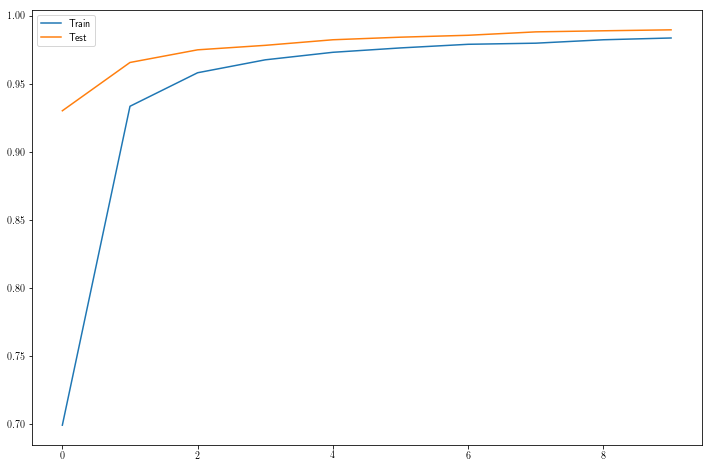

In [211]:
plotAccuracy(acc_values3, val_acc_values3)

In [275]:
predictions_train = model3.predict_classes(X_train_c, verbose=0)

In [276]:
confusion_matrix(y_train, predictions_train)

array([[5896,    1,    3,    0,    0,    2,    8,    0,   10,    3],
       [   0, 6691,    8,    3,    9,    0,    4,   13,   14,    0],
       [   1,    6, 5905,    9,    2,    0,    1,   18,    9,    7],
       [   2,    0,   14, 6043,    0,   24,    0,   17,   17,   14],
       [   1,    4,    2,    0, 5810,    0,    4,    2,    4,   15],
       [   2,    1,    1,    9,    1, 5372,   15,    0,   16,    4],
       [   4,    1,    2,    1,    7,    8, 5887,    0,    8,    0],
       [   0,    6,   12,    1,    9,    1,    0, 6217,    8,   11],
       [   3,    9,    7,    6,   10,   20,    2,    4, 5778,   12],
       [   8,    4,    0,   10,   43,   12,    1,   21,   23, 5827]])

In [277]:
accuracy_score(y_train, predictions_train)

0.9904333333333334

In [297]:
predictions_test = model3.predict_classes(X_test, verbose=0)

In [298]:
confusion_matrix(y_test, predictions_test)

Train on 60000 samples, validate on 10000 samples
Epoch 1/30
60000/60000 [==============================] - 7s 118us/step - loss: 0.5988 - acc: 0.8342 - val_loss: 0.2581 - val_acc: 0.9267
Epoch 2/30
60000/60000 [==============================] - 6s 106us/step - loss: 0.2404 - acc: 0.9335 - val_loss: 0.1884 - val_acc: 0.9469
Epoch 3/30
60000/60000 [==============================] - 6s 98us/step - loss: 0.1823 - acc: 0.9488 - val_loss: 0.1505 - val_acc: 0.9574
Epoch 4/30
60000/60000 [==============================] - 6s 94us/step - loss: 0.1467 - acc: 0.9587 - val_loss: 0.1265 - val_acc: 0.9630
Epoch 5/30
60000/60000 [==============================] - 6s 96us/step - loss: 0.1226 - acc: 0.9650 - val_loss: 0.1107 - val_acc: 0.9669
Epoch 6/30
60000/60000 [==============================] - 6s 99us/step - loss: 0.1047 - acc: 0.9704 - val_loss: 0.1022 - val_acc: 0.9699
Epoch 7/30
60000/60000 [==============================] - 6s 106us/step - loss: 0.0930 - acc: 0.9741 - val_loss: 0.0907 - val_

In [ ]:
accuracy_score(y_test, predictions_test)